# CIFAR10 with Keras and CNN
Testing Keras' CNNs on CIFAR10 with a pretty typical layer disposition.

## Data Setup

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()

170500096/170498071 [==============================] - 65s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

## Model Definition

In [0]:
from keras.models import Sequential
model = Sequential()

In [0]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [7]:
model.add(Conv2D(filters=32, 
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(32, 32, 3)))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.add(MaxPool2D())

In [0]:
model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPool2D())

In [0]:
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
_________________________________________________________________
None


## Fitting

In [13]:
history = model.fit(x_train, y_train, batch_size=50, epochs=15, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 10s 207us/step - loss: 1.5076 - acc: 0.4630 - val_loss: 1.2621 - val_acc: 0.5542
Epoch 2/15
50000/50000 [==============================] - 6s 112us/step - loss: 1.1745 - acc: 0.5915 - val_loss: 1.1074 - val_acc: 0.6143
Epoch 3/15
50000/50000 [==============================] - 6s 112us/step - loss: 1.0454 - acc: 0.6405 - val_loss: 1.0109 - val_acc: 0.6536
Epoch 4/15
50000/50000 [==============================] - 5s 99us/step - loss: 0.9726 - acc: 0.6663 - val_loss: 1.0040 - val_acc: 0.6563
Epoch 5/15
50000/50000 [==============================] - 5s 98us/step - loss: 0.9139 - acc: 0.6861 - val_loss: 0.9735 - val_acc: 0.6638
Epoch 6/15
50000/50000 [==============================] - 5s 98us/step - loss: 0.8674 - acc: 0.7027 - val_loss: 0.9198 - val_acc: 0.6852
Epoch 7/15
50000/50000 [==============================] - 5s 98us/step - los

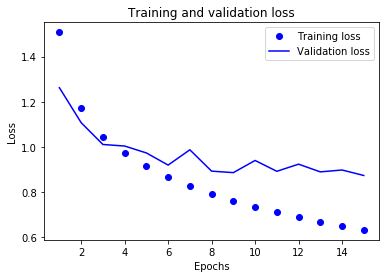

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()